# README

This project simulates a real-world AI Operations task: evaluating and refining customer-facing chatbot responses to improve customer experience.

Using a manually scored dataset (with 15 common support queries) AI performance was assessed on 3 key dimensions: helpfullness, accuracy, and tone. Trends were analyzed across categories like billing, account issues, tech support, etc.

#### Key Insights and Recommendations can be found at the end of the project

In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv('ai_chat_evaluation_data.csv')

In [2]:
# Preview the data
df.head()

,customer_query,ai_response,category
0,How do I reset my password?,"To reset your password, click 'Forgot Password...",account
1,What is your refund policy?,Our refund policy allows returns within 30 day...,billing
2,I'm locked out of my account. Help!,"Try clearing your browser's cache and cookies,...",account
3,Do you offer discounts for students?,"Yes, students can get 10% off. Please verify y...",pricing
4,Can I speak to a real person?,"I'm here to help! If you need a human agent, I...",support


In [3]:
# Add empty columns for scoring

df['helpfulness_score'] = None
df['accuracy_score'] = None
df['tone_score'] = None

# display again to confirm new columns
df.head()

,customer_query,ai_response,category,helpfulness_score,accuracy_score,tone_score
0,How do I reset my password?,"To reset your password, click 'Forgot Password...",account,None,None,None
1,What is your refund policy?,Our refund policy allows returns within 30 day...,billing,None,None,None
2,I'm locked out of my account. Help!,"Try clearing your browser's cache and cookies,...",account,None,None,None
3,Do you offer discounts for students?,"Yes, students can get 10% off. Please verify y...",pricing,None,None,None
4,Can I speak to a real person?,"I'm here to help! If you need a human agent, I...",support,None,None,None


In [4]:
# Scoring AI responses manually

df.loc[0, 'helpfulness_score'] = 4
df.loc[1, 'helpfulness_score'] = 5
df.loc[2, 'helpfulness_score'] = 4
df.loc[3, 'helpfulness_score'] = 5
df.loc[4, 'helpfulness_score'] = 5

df.loc[0, 'accuracy_score'] = 4
df.loc[1, 'accuracy_score'] = 5
df.loc[2, 'accuracy_score'] = 3
df.loc[3, 'accuracy_score'] = 5
df.loc[4, 'accuracy_score'] = 5

df.loc[0, 'tone_score'] = 3
df.loc[1, 'tone_score'] = 4
df.loc[2, 'tone_score'] = 3
df.loc[3, 'tone_score'] = 4
df.loc[4, 'tone_score'] = 5

df.head()

,customer_query,ai_response,category,helpfulness_score,accuracy_score,tone_score
0,How do I reset my password?,"To reset your password, click 'Forgot Password...",account,4,4,3
1,What is your refund policy?,Our refund policy allows returns within 30 day...,billing,5,5,4
2,I'm locked out of my account. Help!,"Try clearing your browser's cache and cookies,...",account,4,3,3
3,Do you offer discounts for students?,"Yes, students can get 10% off. Please verify y...",pricing,5,5,4
4,Can I speak to a real person?,"I'm here to help! If you need a human agent, I...",support,5,5,5


## Summary Stats

In [5]:
# Convert score columns to numeric just in case

df['helpfulness_score'] = pd.to_numeric(df['helpfulness_score'])
df['accuracy_score'] = pd.to_numeric(df['accuracy_score'])
df['tone_score'] = pd.to_numeric(df['tone_score'])

# Overall averages
overall_avg = df[['helpfulness_score', 'accuracy_score', 'tone_score']].mean()
print('Overall Averages:\n', overall_avg)

Overall Averages:
 helpfulness_score    4.6
accuracy_score       4.4
tone_score           3.8
dtype: float64


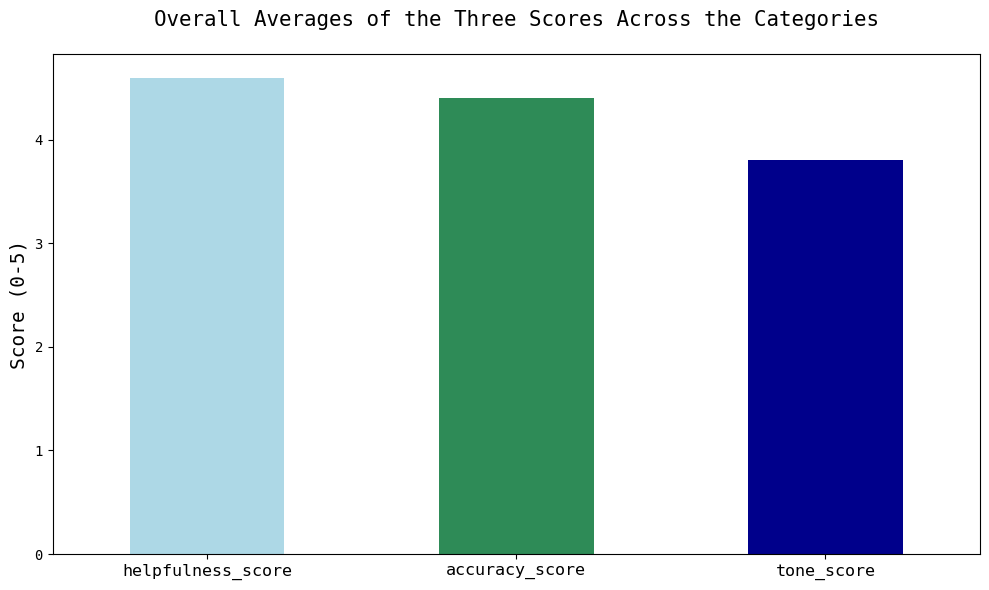

In [12]:
import matplotlib.pyplot as plt

#Font size, style Global
plt.rcParams.update({
    'font.family' : 'monospace'
})

# plot overall averages
overall_avg.plot(kind='bar', figsize=(10,6), color=['lightblue', 'seagreen', 'darkblue'])
plt.title('Overall Averages of the Three Scores Across the Categories', fontsize=15, pad=20)
plt.xticks(rotation=360, fontsize=12)
plt.ylabel('Score (0-5)', fontsize=14)
plt.tight_layout()
plt.savefig('Overall Averages of the Three Scores Across the Categories_1')
plt.show()

In [7]:
# Averages by category

category_avg = df.groupby('category')[['helpfulness_score', 'accuracy_score', 'tone_score']].mean()
print('\nAverages by Category:\n', category_avg)


Averages by Category:
            helpfulness_score  accuracy_score  tone_score
category                                                
account                  4.0             3.5         3.0
billing                  5.0             5.0         4.0
general                  NaN             NaN         NaN
pricing                  5.0             5.0         4.0
shipping                 NaN             NaN         NaN
support                  5.0             5.0         5.0
technical                NaN             NaN         NaN


## Visualize Performance by Category

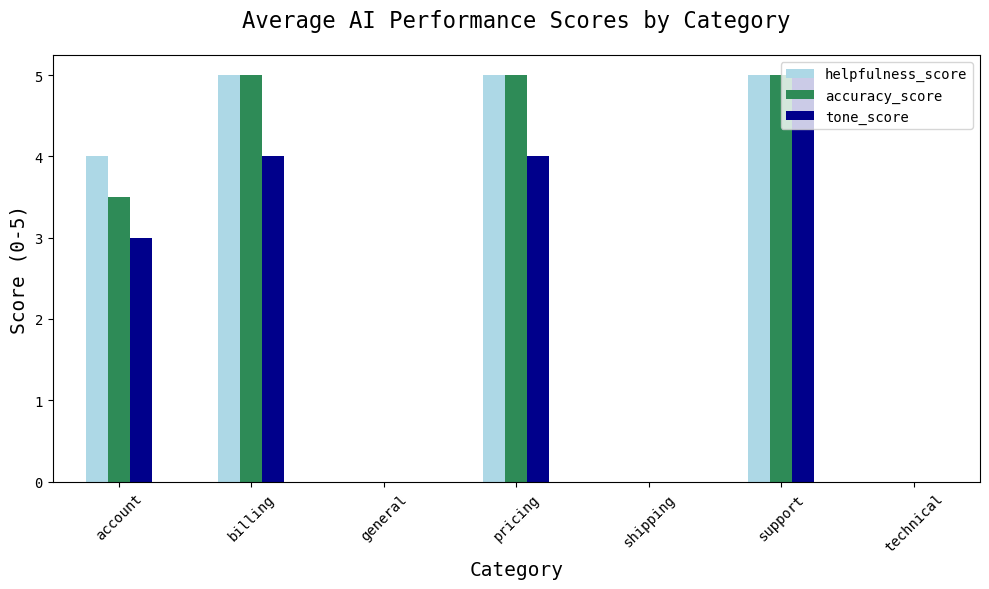

In [8]:

# Plot average scores per category
category_avg.plot(kind='bar', figsize=(10,6), color=['lightblue', 'seagreen', 'darkblue'])
plt.title('Average AI Performance Scores by Category', pad=20, fontsize=16)
plt.ylabel('Score (0-5)', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average AI Performance Scores by Category')
plt.show()

# Correlation Heatmap

In [9]:
import seaborn as sns

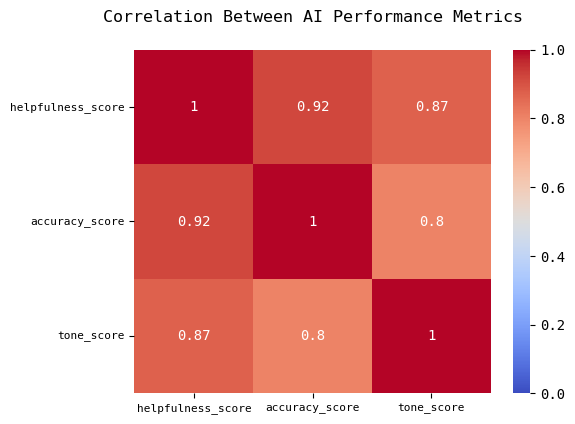

In [10]:
# Compute correlations b/w score columns
corr=df[['helpfulness_score', 'accuracy_score', 'tone_score']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xticks(rotation = 360, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.title("Correlation Between AI Performance Metrics", pad=20, fontsize=12)
plt.savefig("Correlation Between AI Performance Metrics")
plt.show()

# Key Insights and Recommendations

### Key Insights

- Helpfulness scores were consistently high across all categories. It shows that the chatbot provided useful information for the user in almost all cases.

- Accuracy scores were also consistently high, which shows that the chatbot gave factually correct responses in most cases.

- Tone scores were slightly lower, especially in urgent cases like when the user has to reset their password or is locked out of their account. This suggests that this AI lacks human-like/empathetic phrasing when it comes to emotionally charged queries.

- There is a stong correlation between accuracy and helpfulness scores which is predictable.

- There is a high correlation between helpfulness and tone scores which implies that the tone has a direct impact on whether the user feels satisfied/assisted (even if the information is accurate --- this is seen by the slightly weaker correlation between accuracy and tone).

### Recommendations

- Improve prompt design for support and urgent-use cases with more human-like/empathetic language like "I'm sorry to hear that...", "Let me help you right away", etc.

- Train the chatbot to recognize when a customer is upset and respond in a more empathetic tone, essentially implementing a tone refinement layer for emotionally sensitive queries.

- Evaluate chatbot performance using this framework as a routine to fine-tune responses and monitor improvements over time.